In [2]:
import numpy as np
import pandas as pd
from math import pi
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as sklm
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(r'..\data\1EData_PredictorData2019.xlsx', sheet_name='Monthly')
data

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,PPIG,IPG
0,187101,4.440000,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.500000,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.610000,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.740000,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.860000,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.003698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,201908,2926.459961,56.838763,133.69,0.237917,0.0210,0.0298,0.0387,0.0163,-0.010244,0.001625,-0.000051,0.0797,0.0738,0.004318,NaN,-0.016085,-0.018377,-0.747384,0.705045
1784,201909,2976.739990,57.219507,132.90,0.233377,0.0195,0.0303,0.0391,0.0170,-0.010959,0.001575,0.000783,-0.0192,-0.0190,0.000605,NaN,0.018791,0.017272,-0.401606,-0.347551
1785,201910,3037.560059,57.559879,135.09,0.232261,0.0189,0.0301,0.0392,0.0171,-0.013267,0.001375,0.002286,-0.0052,0.0006,0.001510,NaN,0.021621,0.020441,0.100806,-0.406952
1786,201911,3140.979980,57.900251,137.28,0.223938,0.0165,0.0306,0.0394,0.0181,-0.007907,0.001283,-0.000536,-0.0059,0.0014,0.000306,NaN,0.036206,0.033979,0.201410,0.928027


In [4]:
data['DP'] = data['D12'].apply(np.log) - data['Index'].apply(np.log)
data['EP'] = data['E12'].apply(np.log) - data['Index'].apply(np.log)
# data['VOL'] = data['CRSP_SPvw'].abs().rolling(window=12).mean()*np.sqrt(pi/6) 这里是不是需要修改？？
data['VOL'] = data['CRSP_SPvw'].abs().rolling(window=12).mean()*np.sqrt(pi*6)
data['BILL'] = data['tbl'] - data['tbl'].rolling(window=12).mean()
data['BOND'] = data['lty'] - data['lty'].rolling(window=12).mean()
data['TERM'] = data['lty'] - data['tbl']
data['CREDIT'] = data['AAA'] - data['lty']
data['MA112'] = data['Index'] >= data['Index'].rolling(window=12).mean()
data['MA312']  =data['Index'].rolling(window=3).mean() >= data['Index'].rolling(window=12).mean()
data['MOM6'] =  data['Index'] >= data['Index'].shift(periods=6)
data['ExRet'] = data['CRSP_SPvw'] - data['Rfree']
data[['MA112', 'MA312', 'MOM6']] = data[['MA112', 'MA312', 'MOM6']].astype(int)
data

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,...,EP,VOL,BILL,BOND,TERM,CREDIT,MA112,MA312,MOM6,ExRet
0,187101,4.440000,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.406945,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1,187102,4.500000,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.420368,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
2,187103,4.610000,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.444519,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
3,187104,4.740000,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.472328,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
4,187105,4.860000,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.497329,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,201908,2926.459961,56.838763,133.69,0.237917,0.0210,0.0298,0.0387,0.0163,-0.010244,...,-3.086025,0.188374,-0.001725,-0.009958,-0.0047,0.0135,1,1,1,-0.017710
1784,201909,2976.739990,57.219507,132.90,0.233377,0.0195,0.0303,0.0391,0.0170,-0.010959,...,-3.108987,0.193314,-0.003158,-0.007892,-0.0025,0.0133,1,1,1,0.017216
1785,201910,3037.560059,57.559879,135.09,0.232261,0.0189,0.0301,0.0392,0.0171,-0.013267,...,-3.112869,0.176386,-0.003558,-0.006283,-0.0018,0.0130,1,1,1,0.020246
1786,201911,3140.979980,57.900251,137.28,0.223938,0.0165,0.0306,0.0394,0.0181,-0.007907,...,-3.130267,0.182339,-0.005458,-0.004150,0.0016,0.0125,1,1,1,0.034923


In [5]:
data = pd.concat([data[['yyyymm', 'CRSP_SPvw', 'Rfree', 'ExRet',
                        'DP', 'EP', 'VOL', 'BILL', 'BOND', 'TERM', 'CREDIT', 'PPIG', 'IPG',
                        'MA112', 'MA312', 'MOM6']],
                  data[['DP', 'EP', 'VOL', 'BILL', 'BOND', 'TERM', 'CREDIT', 'PPIG', 'IPG',
                        'MA112', 'MA312', 'MOM6']].shift(periods=1)], axis=1)
data

,yyyymm,CRSP_SPvw,Rfree,ExRet,DP,EP,VOL,BILL,BOND,TERM,...,VOL,BILL,BOND,TERM,CREDIT,PPIG,IPG,MA112,MA312,MOM6
0,187101,NaN,0.004967,NaN,-2.837728,-2.406945,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,NaN,0.004525,NaN,-2.851151,-2.420368,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,187103,NaN,0.004252,NaN,-2.875302,-2.444519,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,187104,NaN,0.004643,NaN,-2.903111,-2.472328,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,187105,NaN,0.003698,NaN,-2.928112,-2.497329,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,201908,-0.016085,0.001625,-0.017710,-3.941330,-3.086025,0.188374,-0.001725,-0.009958,-0.0047,...,0.194472,-0.000908,-0.006742,-0.0011,0.0123,0.199700,-0.175883,1.0,1.0,1.0
1784,201909,0.018791,0.001575,0.017216,-3.951689,-3.108987,0.193314,-0.003158,-0.007892,-0.0025,...,0.188374,-0.001725,-0.009958,-0.0047,0.0135,-0.747384,0.705045,1.0,1.0,1.0
1785,201910,0.021621,0.001375,0.020246,-3.965984,-3.112869,0.176386,-0.003558,-0.006283,-0.0018,...,0.193314,-0.003158,-0.007892,-0.0025,0.0133,-0.401606,-0.347551,1.0,1.0,1.0
1786,201911,0.036206,0.001283,0.034923,-3.993568,-3.130267,0.182339,-0.005458,-0.004150,0.0016,...,0.176386,-0.003558,-0.006283,-0.0018,0.0130,0.100806,-0.406952,1.0,1.0,1.0


In [6]:
data.columns = ['yyyymm', 'Ret', 'Rfree', 'ExRet',
                'DP', 'EP', 'VOL', 'BILL', 'BOND', 'TERM', 'CREDIT', 'PPIG', 'IPG',
                'MA112', 'MA312', 'MOM6', 'DPL1',
                'EPL1', 'VOLL1', 'BILLL1', 'BONDL1', 'TERML1', 'CREDITL1', 'PPIGL1', 'IPGL1',
                'MA112L1', 'MA312L1', 'MOM6L1']
data

,yyyymm,Ret,Rfree,ExRet,DP,EP,VOL,BILL,BOND,TERM,...,VOLL1,BILLL1,BONDL1,TERML1,CREDITL1,PPIGL1,IPGL1,MA112L1,MA312L1,MOM6L1
0,187101,NaN,0.004967,NaN,-2.837728,-2.406945,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,NaN,0.004525,NaN,-2.851151,-2.420368,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,187103,NaN,0.004252,NaN,-2.875302,-2.444519,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,187104,NaN,0.004643,NaN,-2.903111,-2.472328,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,187105,NaN,0.003698,NaN,-2.928112,-2.497329,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,201908,-0.016085,0.001625,-0.017710,-3.941330,-3.086025,0.188374,-0.001725,-0.009958,-0.0047,...,0.194472,-0.000908,-0.006742,-0.0011,0.0123,0.199700,-0.175883,1.0,1.0,1.0
1784,201909,0.018791,0.001575,0.017216,-3.951689,-3.108987,0.193314,-0.003158,-0.007892,-0.0025,...,0.188374,-0.001725,-0.009958,-0.0047,0.0135,-0.747384,0.705045,1.0,1.0,1.0
1785,201910,0.021621,0.001375,0.020246,-3.965984,-3.112869,0.176386,-0.003558,-0.006283,-0.0018,...,0.193314,-0.003158,-0.007892,-0.0025,0.0133,-0.401606,-0.347551,1.0,1.0,1.0
1786,201911,0.036206,0.001283,0.034923,-3.993568,-3.130267,0.182339,-0.005458,-0.004150,0.0016,...,0.176386,-0.003558,-0.006283,-0.0018,0.0130,0.100806,-0.406952,1.0,1.0,1.0


In [7]:
data = data[data['yyyymm'] >= 192701]
data.reset_index(drop=True, inplace=True)
data

,yyyymm,Ret,Rfree,ExRet,DP,EP,VOL,BILL,BOND,TERM,...,VOLL1,BILLL1,BONDL1,TERML1,CREDITL1,PPIGL1,IPGL1,MA112L1,MA312L1,MOM6L1
0,192701,-0.002910,0.002692,-0.005602,-2.942374,-2.374773,0.133608,-0.001625,-0.001508,0.0044,...,0.133201,0.000808,-0.001400,0.0019,0.0114,-0.588235,-0.400104,1.0,1.0,1.0
1,192702,0.045522,0.002742,0.042780,-2.979535,-2.430353,0.138032,0.000192,-0.001700,0.0024,...,0.133608,-0.001625,-0.001508,0.0044,0.0115,-2.958580,-0.401711,1.0,1.0,1.0
2,192703,0.007324,0.002667,0.004657,-2.976535,-2.445079,0.119803,0.000700,-0.002967,0.0002,...,0.138032,0.000192,-0.001700,0.0024,0.0120,1.219512,0.806663,1.0,1.0,1.0
3,192704,0.013021,0.002825,0.010196,-2.984225,-2.471309,0.110576,-0.000250,-0.002475,0.0013,...,0.119803,0.000700,-0.002967,0.0002,0.0131,-0.602410,1.200312,1.0,1.0,1.0
4,192705,0.062353,0.002775,0.059578,-3.025963,-2.531446,0.128207,0.001392,-0.002725,-0.0012,...,0.110576,-0.000250,-0.002475,0.0013,0.0125,-1.212121,-2.372151,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,201908,-0.016085,0.001625,-0.017710,-3.941330,-3.086025,0.188374,-0.001725,-0.009958,-0.0047,...,0.194472,-0.000908,-0.006742,-0.0011,0.0123,0.199700,-0.175883,1.0,1.0,1.0
1112,201909,0.018791,0.001575,0.017216,-3.951689,-3.108987,0.193314,-0.003158,-0.007892,-0.0025,...,0.188374,-0.001725,-0.009958,-0.0047,0.0135,-0.747384,0.705045,1.0,1.0,1.0
1113,201910,0.021621,0.001375,0.020246,-3.965984,-3.112869,0.176386,-0.003558,-0.006283,-0.0018,...,0.193314,-0.003158,-0.007892,-0.0025,0.0133,-0.401606,-0.347551,1.0,1.0,1.0
1114,201911,0.036206,0.001283,0.034923,-3.993568,-3.130267,0.182339,-0.005458,-0.004150,0.0016,...,0.176386,-0.003558,-0.006283,-0.0018,0.0130,0.100806,-0.406952,1.0,1.0,1.0


<Axes: >

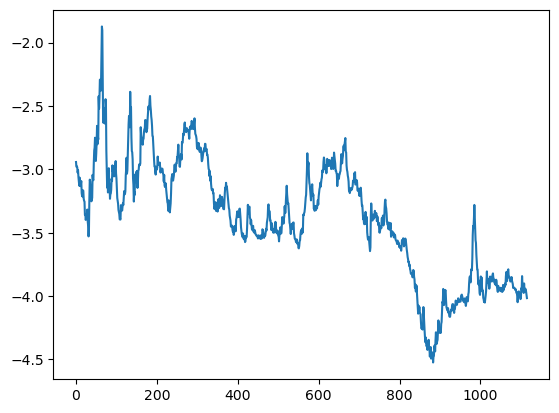

In [8]:
data['DP'].plot()

<Axes: >

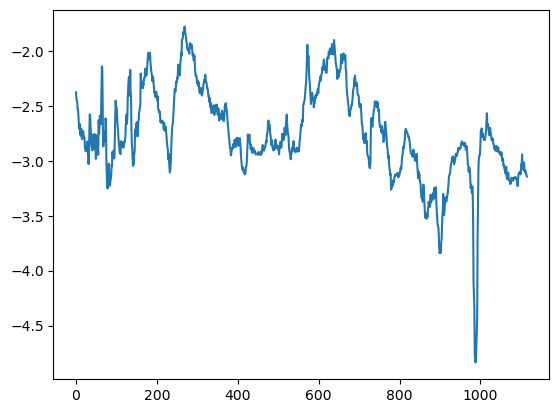

In [9]:
data['EP'].plot()

In [10]:
for i in data.columns[4:16]:
    factor=i
    print(data[['ExRet', i]])

         ExRet        DP
0    -0.005602 -2.942374
1     0.042780 -2.979535
2     0.004657 -2.976535
3     0.010196 -2.984225
4     0.059578 -3.025963
...        ...       ...
1111 -0.017710 -3.941330
1112  0.017216 -3.951689
1113  0.020246 -3.965984
1114  0.034923 -3.993568
1115  0.028505 -4.015896

[1116 rows x 2 columns]
         ExRet        EP
0    -0.005602 -2.374773
1     0.042780 -2.430353
2     0.004657 -2.445079
3     0.010196 -2.471309
4     0.059578 -2.531446
...        ...       ...
1111 -0.017710 -3.086025
1112  0.017216 -3.108987
1113  0.020246 -3.112869
1114  0.034923 -3.130267
1115  0.028505 -3.142629

[1116 rows x 2 columns]
         ExRet       VOL
0    -0.005602  0.133608
1     0.042780  0.138032
2     0.004657  0.119803
3     0.010196  0.110576
4     0.059578  0.128207
...        ...       ...
1111 -0.017710  0.188374
1112  0.017216  0.193314
1113  0.020246  0.176386
1114  0.034923  0.182339
1115  0.028505  0.160321

[1116 rows x 2 columns]
         ExRet      BILL


In [11]:
for i in data.columns[4:16]:
    factor=i
    model = smf.ols(f'ExRet ~ {i}', data=data[['ExRet', i]])
    results = model.fit()
    rg_con = results.params['Intercept']
    rg_con_pvalue = results.pvalues['Intercept']
    rg_i = results.params[i]
    rg_i_pvalue = results.pvalues[i]
    if rg_i_pvalue <= 0.01:
        jud = '在1%的显著性水平下有样本内预测能力'
    elif (rg_i_pvalue > 0.01) & (rg_i_pvalue <= 0.05):
        jud = '在5%的显著性水平下有样本内预测能力'
    elif (rg_i_pvalue > 0.05) & (rg_i_pvalue <= 0.1):
        jud = '在10%的显著性水平下有样本内预测能力'
    else:
        jud = '无样本内预测能力'
    print('In-sample tests for one factor model with OLS:')
    print('Predictor: {:s}'.format(factor))
    print('Regressing Results: b = {:f}, k = {:f}'.format(rg_con, rg_i))
    print('Regressing Pvalues: p = {:f}, p = {:f}'.format(rg_con_pvalue, rg_i_pvalue))
    print('Inference: {:s}'.format(jud))


In-sample tests for one factor model with OLS:
Predictor: DP
Regressing Results: b = -0.016494, k = -0.006830
Regressing Pvalues: p = 0.167258, p = 0.050744
Inference: 在10%的显著性水平下有样本内预测能力
In-sample tests for one factor model with OLS:
Predictor: EP
Regressing Results: b = -0.015230, k = -0.007963
Regressing Pvalues: p = 0.160354, p = 0.041637
Inference: 在5%的显著性水平下有样本内预测能力
In-sample tests for one factor model with OLS:
Predictor: VOL
Regressing Results: b = -0.000123, k = 0.040301
Regressing Pvalues: p = 0.971027, p = 0.023613
Inference: 在5%的显著性水平下有样本内预测能力
In-sample tests for one factor model with OLS:
Predictor: BILL
Regressing Results: b = 0.006610, k = -0.338122
Regressing Pvalues: p = 0.000050, p = 0.111058
Inference: 无样本内预测能力
In-sample tests for one factor model with OLS:
Predictor: BOND
Regressing Results: b = 0.006481, k = -1.757020
Regressing Pvalues: p = 0.000060, p = 0.000002
Inference: 在1%的显著性水平下有样本内预测能力
In-sample tests for one factor model with OLS:
Predictor: TERM
Regressin

In [12]:
def myfun_stat_gains(rout, rmean, rreal):
    R2os = 1 - np.sum((rreal-rout)**2)/np.sum((rreal-rmean)**2)
    d = (rreal - rmean)**2 - ((rreal-rout)**2 - (rmean-rout)**2)
    x = sm.add_constant(np.arange(len(d))+1)
    model = sm.OLS(d, x)
    fitres = model.fit()
    MFSEadj = fitres.tvalues[0]
    pvalue_MFSEadj = fitres.pvalues[0]

    if (R2os > 0) & (pvalue_MFSEadj <= 0.01):
        jud = '在1%的显著性水平下有样本外预测能力'
    elif (R2os > 0) & (pvalue_MFSEadj > 0.01) & (pvalue_MFSEadj <= 0.05):
        jud = '在5%的显著性水平下有样本外预测能力'
    elif (R2os > 0) & (pvalue_MFSEadj > 0.05) & (pvalue_MFSEadj <= 0.1):
        jud = '在10%的显著性水平下有样本外预测能力'
    else:
        jud = '无样本外预测能力'
    print('Stat gains: R2os = {:f}, MFSEadj = {:f}, MFSEpvalue = {:f}'.format(R2os, MFSEadj, pvalue_MFSEadj))
    print('Inference: {:s}'.format(jud))

    return R2os, MFSEadj, pvalue_MFSEadj

In [13]:
def myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm = 5):
    omg_out = rout/volt2/gmm
    rp_out = rfree + omg_out*rreal
    Uout = np.mean(rp_out) - 0.5*gmm*np.var(rp_out)
    omg_mean = rmean/volt2/gmm
    rp_mean = rfree + omg_mean*rreal
    Umean = np.mean(rp_mean) - 0.5*gmm*np.var(rp_mean)
    DeltaU = Uout - Umean

    if DeltaU < 10**-6:
        jud = '没有经济意义'
    else:
        jud = '有经济意义'
    print('Econ Gains: Delta U = {:f}, Upred = {:f}, Umean = {:f}'.format(DeltaU, Uout, Umean))
    print('Inference: {:s}'.format(jud))

    return Uout, Umean, DeltaU

In [14]:
# 样本外检验
# 单因子模型: OLS线性拟合
for j in data.columns[4:16]:
    factor_out=j
    datafit = data[['yyyymm', 'Ret', 'Rfree', 'ExRet', j, j+'L1']].copy(deep=True)
    n_in = np.sum(datafit['yyyymm'] <= 195612)
    n_out = np.sum(datafit['yyyymm'] > 195612)
    rout = np.zeros(n_out)
    rmean = np.zeros(n_out)
    rreal = np.zeros(n_out)
    rfree = np.zeros(n_out)
    volt2 = np.zeros(n_out)
    for i in range(n_out):
        model = smf.ols('ExRet ~ '+j+'L1', data=datafit[['ExRet', j+'L1']].iloc[:(n_in+i),:])
        results = model.fit()
        b = results.params['Intercept']
        k = results.params[j+'L1']
        f = datafit[j].iloc[n_in+i-1]
        rreal[i] = datafit['ExRet'].iloc[n_in+i]
        rfree[i] = datafit['Rfree'].iloc[n_in+i]
        rout[i] = k*f+b
        rmean[i] = np.mean(datafit['ExRet'].iloc[:(n_in+i)].values)
        volt2[i] = np.sum(datafit['Ret'].iloc[(n_in+i-12):(n_in+i)].values**2)
    print()
    print('Out-of-sample tests for one factor model with OLS:')
    print('Predictor: {:s}'.format(factor_out))
    R2os, MFSEadj, pvalue_MFSEadj = myfun_stat_gains(rout, rmean, rreal)
    Uout, Umean, DeltaU = myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm=5)
    del datafit

# factor_out = 'DP'
# datafit = data[['yyyymm', 'Ret', 'Rfree', 'ExRet', 'DP', 'DPL1']].copy(deep=True)
#
# n_in = np.sum(datafit['yyyymm'] <= 195612)
# n_out = np.sum(datafit['yyyymm'] > 195612)
# rout = np.zeros(n_out)
# rmean = np.zeros(n_out)
# rreal = np.zeros(n_out)
# rfree = np.zeros(n_out)
# volt2 = np.zeros(n_out)
# for i in range(n_out):
#     model = smf.ols('ExRet ~ DPL1', data=datafit[['ExRet', 'DPL1']].iloc[:(n_in+i),:])
#     results = model.fit()
#     b = results.params['Intercept']
#     k = results.params['DPL1']
#     f = datafit['DP'].iloc[n_in+i-1]
#     rreal[i] = datafit['ExRet'].iloc[n_in+i]
#     rfree[i] = datafit['Rfree'].iloc[n_in+i]
#     rout[i] = k*f+b
#     rmean[i] = np.mean(datafit['ExRet'].iloc[:(n_in+i)].values)
#     volt2[i] = np.sum(datafit['Ret'].iloc[(n_in+i-12):(n_in+i)].values**2)
#
# print()
# print('Out-of-sample tests for one factor model with OLS:')
# print('Predictor: {:s}'.format(factor_out))
# R2os, MFSEadj, pvalue_MFSEadj = myfun_stat_gains(rout, rmean, rreal)
# Uout, Umean, DeltaU = myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm=5)
# del datafit


Out-of-sample tests for one factor model with OLS:
Predictor: DP
Stat gains: R2os = -0.005143, MFSEadj = 2.062252, MFSEpvalue = 0.039526
Inference: 无样本外预测能力
Econ Gains: Delta U = -0.000301, Upred = 0.003771, Umean = 0.004072
Inference: 没有经济意义

Out-of-sample tests for one factor model with OLS:
Predictor: EP
Stat gains: R2os = -0.015106, MFSEadj = 0.640065, MFSEpvalue = 0.522325
Inference: 无样本外预测能力
Econ Gains: Delta U = -0.000170, Upred = 0.003902, Umean = 0.004072
Inference: 没有经济意义

Out-of-sample tests for one factor model with OLS:
Predictor: VOL
Stat gains: R2os = 0.004113, MFSEadj = 2.097376, MFSEpvalue = 0.036293
Inference: 在5%的显著性水平下有样本外预测能力
Econ Gains: Delta U = -0.000069, Upred = 0.004003, Umean = 0.004072
Inference: 没有经济意义

Out-of-sample tests for one factor model with OLS:
Predictor: BILL
Stat gains: R2os = -0.000322, MFSEadj = 2.795891, MFSEpvalue = 0.005307
Inference: 无样本外预测能力
Econ Gains: Delta U = 0.000049, Upred = 0.004121, Umean = 0.004072
Inference: 有经济意义

Out-of-sample

In [15]:
# 样本外检验
    # 多因子模型：OLS线性拟合
factor_out = 'DP, EP, VOL, BILL, BOND, TERM, CREDIT, PPIG, IPG, MA112, MA312, MOM6'
datafit = data.copy(deep=True)

n_in = np.sum(datafit['yyyymm'] <= 195612)
n_out = np.sum(datafit['yyyymm'] > 195612)
rout = np.zeros(n_out)
rmean = np.zeros(n_out)
rreal = np.zeros(n_out)
rfree = np.zeros(n_out)
volt2 = np.zeros(n_out)

for i in range(n_out):
    model = smf.ols('ExRet ~ DPL1 + EPL1 + VOLL1 + BILLL1 + BONDL1 + TERML1 + CREDITL1 + '
                    'PPIGL1 + IPGL1 + MA112L1 + MA312L1 + MOM6L1',
                    data=datafit[['ExRet', 'DPL1', 'EPL1', 'VOLL1', 'BILLL1', 'BONDL1', 'TERML1',
                                  'CREDITL1', 'PPIGL1', 'IPGL1', 'MA112L1', 'MA312L1', 'MOM6L1']].iloc[:(n_in+i), :])
    results = model.fit()
    k = results.params.values
    f = datafit[['DP', 'EP', 'VOL', 'BILL', 'BOND', 'TERM', 'CREDIT', 'PPIG',
                 'IPG', 'MA112', 'MA312', 'MOM6']].iloc[n_in+i-1, :].values
    f = np.concatenate((np.array([1]), f))
    rreal[i] = datafit['ExRet'].iloc[n_in+i]
    rfree[i] = datafit['Rfree'].iloc[n_in+i]
    rout[i] = np.sum(k*f)
    rmean[i] = np.mean(datafit['ExRet'].iloc[:(n_in+i)].values)
    volt2[i] = np.sum(datafit['Ret'].iloc[(n_in+i-12):(n_in+i)].values**2)


print('Out-of-sample tests for multi-factor model with OLS:')
print('Predictor: {:s}'.format(factor_out))
R2os, MFSEadj, pvalue_MFSEadj = myfun_stat_gains(rout, rmean, rreal)
Uout, Umean, DeltaU = myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm=5)
del datafit


Out-of-sample tests for multi-factor model with OLS:
Predictor: DP, EP, VOL, BILL, BOND, TERM, CREDIT, PPIG, IPG, MA112, MA312, MOM6
Stat gains: R2os = -0.032711, MFSEadj = 2.848436, MFSEpvalue = 0.004513
Inference: 无样本外预测能力
Econ Gains: Delta U = 0.000494, Upred = 0.004566, Umean = 0.004072
Inference: 有经济意义


找不到 E:\大三下study\蒋志强\实验4\实验代码\datafit


In [26]:
factor_out = 'DP, EP, VOL, BILL, BOND, TERM, CREDIT, PPIG, IPG, MA112, MA312, MOM6'
factor_list = np.array(['DP', 'EP', 'VOL', 'BILL', 'BOND', 'TERM', 'CREDIT', 'PPIG', 'IPG', 'MA112', 'MA312', 'MOM6'])
datafit = data.copy(deep=True)
n_in = np.sum(datafit['yyyymm'] <= 195612)
n_out = np.sum(datafit['yyyymm'] > 195612)
rout = np.zeros(n_out)
rmean = np.zeros(n_out)
rreal = np.zeros(n_out)
rfree = np.zeros(n_out)
volt2 = np.zeros(n_out)
# reg = sklm.LassoCV(random_state=0, cv=10, fit_intercept=True, normalize=True, precompute='auto', copy_X=True, n_jobs=-1, max_iter=10**9, tol=10-6)
# reg_lasso = linear_model.LassoLarsCV(cv=10, fit_intercept=True, normalize=True, precompute='auto', copy_X=True, n_jobs=-1, max_iter=10000000)
# reg = sklm.RidgeCV(cv=10, fit_intercept=True)
# reg = sklm.ElasticNetCV(random_state=0, cv=10, fit_intercept=True, precompute='auto', copy_X=True, n_jobs=-1, max_iter=10**9, tol=10-6)
for j in range(3):
    if j==0:
        reg = sklm.LassoCV(random_state=0, cv=10, fit_intercept=True,precompute='auto', copy_X=True, n_jobs=-1, max_iter=10**9, tol=10-6)
    elif j==1:
        reg = sklm.RidgeCV(cv=10, fit_intercept=True)
    else:
        reg = sklm.ElasticNetCV(random_state=0, cv=10, fit_intercept=True, precompute='auto', copy_X=True, n_jobs=-1, max_iter=10**9, tol=10-6)
    for i in range(n_out):
        X = datafit[['DPL1', 'EPL1', 'VOLL1', 'BILLL1', 'BONDL1', 'TERML1',
                     'CREDITL1', 'PPIGL1', 'IPGL1', 'MA112L1', 'MA312L1', 'MOM6L1']].iloc[:(n_in+i), :].values
        y = datafit['ExRet'].iloc[:(n_in+i)].values
        reg.fit(X, y)
        # print(factor_list[np.abs(reg.coef_) != 0])
        k = np.concatenate((np.array([reg.intercept_]), reg.coef_))
        f = datafit[['DP', 'EP', 'VOL', 'BILL', 'BOND', 'TERM', 'CREDIT', 'PPIG',
                     'IPG', 'MA112', 'MA312', 'MOM6']].iloc[n_in+i-1, :].values
        f = np.concatenate((np.array([1]), f))
        rreal[i] = datafit['ExRet'].iloc[n_in+i]
        rfree[i] = datafit['Rfree'].iloc[n_in+i]
        rout[i] = np.sum(k*f)
        rmean[i] = np.mean(datafit['ExRet'].iloc[:(n_in+i)].values)
        volt2[i] = np.sum(datafit['Ret'].iloc[(n_in+i-12):(n_in+i)].values**2)
    print('Out-of-sample tests for multi-factor model with ML method:')
    print('Predictor: {:s}'.format(factor_out))
    R2os, MFSEadj, pvalue_MFSEadj = myfun_stat_gains(rout, rmean, rreal)
    Uout, Umean, DeltaU = myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm=5)
del datafit


Out-of-sample tests for multi-factor model with ML method:
Predictor: DP, EP, VOL, BILL, BOND, TERM, CREDIT, PPIG, IPG, MA112, MA312, MOM6
Stat gains: R2os = -0.003283, MFSEadj = 0.941862, MFSEpvalue = 0.346565
Inference: 无样本外预测能力
Econ Gains: Delta U = -0.000134, Upred = 0.003938, Umean = 0.004072
Inference: 没有经济意义

Out-of-sample tests for multi-factor model with ML method:
Predictor: DP, EP, VOL, BILL, BOND, TERM, CREDIT, PPIG, IPG, MA112, MA312, MOM6
Stat gains: R2os = -0.016129, MFSEadj = 1.509745, MFSEpvalue = 0.131527
Inference: 无样本外预测能力
Econ Gains: Delta U = -0.000100, Upred = 0.003972, Umean = 0.004072
Inference: 没有经济意义

Out-of-sample tests for multi-factor model with ML method:
Predictor: DP, EP, VOL, BILL, BOND, TERM, CREDIT, PPIG, IPG, MA112, MA312, MOM6
Stat gains: R2os = -0.002174, MFSEadj = 0.922876, MFSEpvalue = 0.356367
Inference: 无样本外预测能力
Econ Gains: Delta U = -0.000127, Upred = 0.003945, Umean = 0.004072
Inference: 没有经济意义
